In [2]:
import pandas as pd
import jupyter as jp
import numpy as np
import matplotlib.pyplot as plt
import requests as req
import json
print("Testing")

In [ ]:
response = requests.post('https://oauth.battle.net/token', auth=('', ''), data={'grant_type': 'client_credentials'})
if response.status_code == 200:
    access_token = response.json()['access_token']
    print('Access token:', access_token)
else:
    print('Failed to retreive access token')
    print("status code:", response.status_code)
    print('Response:', response.text)

In [2]:
import requests

access_token = ""  # Replace with your actual access token

api_url = "https://us.api.blizzard.com/data/wow/realm/index"
namespace = "dynamic-us"  # Adjust as necessary
locale = "en_US"  # Locale can be adjusted as needed

headers = {
    'Authorization': f'Bearer {access_token}',
    'Battlenet-Namespace': namespace,
    'locale': locale
}

response = requests.get(api_url, headers=headers)

if response.status_code == 200:
    realms_data = response.json()
    for realm in realms_data.get('realms', []):
        print(realm['id'], realm['name'])
else:
    print('Failed to retrieve realm data')
    print('Status Code:', response.status_code)
    print('Response:', response.text)

129 {'en_US': 'Gurubashi', 'es_MX': 'Gurubashi', 'pt_BR': 'Gurubashi', 'de_DE': 'Gurubashi', 'en_GB': 'Gurubashi', 'es_ES': 'Gurubashi', 'fr_FR': 'Gurubashi', 'it_IT': 'Gurubashi', 'ru_RU': 'Gurubashi', 'ko_KR': 'Gurubashi', 'zh_TW': '古拉巴什', 'zh_CN': '古拉巴什'}
131 {'en_US': 'Skywall', 'es_MX': 'Skywall', 'pt_BR': 'Skywall', 'de_DE': 'Skywall', 'en_GB': 'Skywall', 'es_ES': 'Skywall', 'fr_FR': 'Skywall', 'it_IT': 'Skywall', 'ru_RU': 'Skywall', 'ko_KR': 'Skywall', 'zh_TW': '天空之牆', 'zh_CN': '天空之墙'}
66 {'en_US': 'Dalaran', 'es_MX': 'Dalaran', 'pt_BR': 'Dalaran', 'de_DE': 'Dalaran', 'en_GB': 'Dalaran', 'es_ES': 'Dalaran', 'fr_FR': 'Dalaran', 'it_IT': 'Dalaran', 'ru_RU': 'Dalaran', 'ko_KR': 'Dalaran', 'zh_TW': '達拉然', 'zh_CN': '达拉然'}
51 {'en_US': 'Garona', 'es_MX': 'Garona', 'pt_BR': 'Garona', 'de_DE': 'Garona', 'en_GB': 'Garona', 'es_ES': 'Garona', 'fr_FR': 'Garona', 'it_IT': 'Garona', 'ru_RU': 'Garona', 'ko_KR': 'Garona', 'zh_TW': '迦羅娜', 'zh_CN': '迦罗娜'}
103 {'en_US': 'Thunderlord', 'es_MX': 'T

In [12]:
import requests
import pandas as pd
from pandas import json_normalize

access_token = ""  # Replace with your actual access token
realm_id = 106  # Replace with the actual realm ID
namespace = 'dynamic-us'  # Namespace for US region

# Corrected API URL format
api_url = f'https://us.api.blizzard.com/data/wow/connected-realm/{realm_id}/auctions'

# Parameters
params = {
    'namespace': namespace,
    'locale': 'en_US'  # Or your preferred locale
}

# Headers
headers = {
    'Authorization': f'Bearer {access_token}'
}

# Making the GET request
response = requests.get(api_url, headers=headers, params=params)

# Checking the response
if response.status_code == 200:
    data = response.json()
    df = pd.json_normalize(data, record_path=['auctions'])

    # Save DataFrame to CSV
    df.to_csv('C:/Users/Robert/Desktop/Project_1/auction_data.csv', index=False)
    print("Data saved to 'auction_data.csv'")

else:
    print('Failed to retrieve auction data')
    print("Status Code:", response.status_code)
    print('Response:', response.text)

Data saved to 'auction_data.csv'


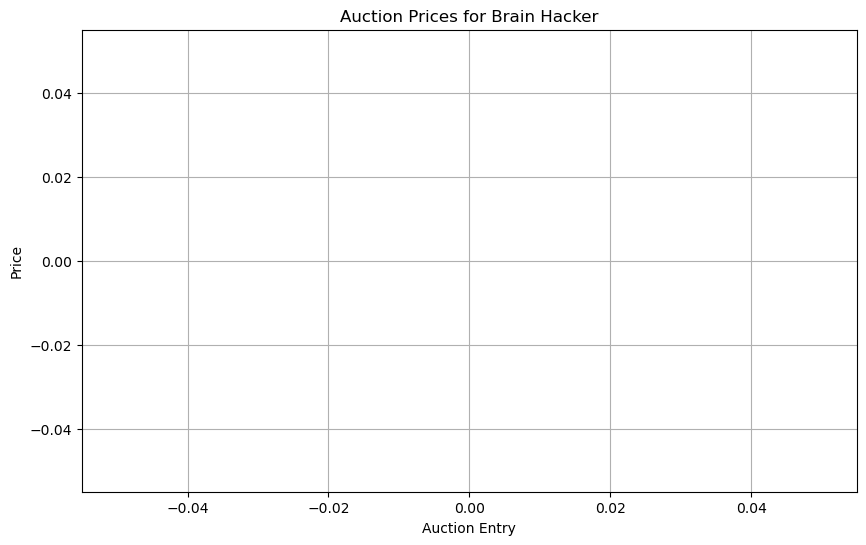

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('C:/Users/Robert/Desktop/Project_1/auction_data.csv')
# remove data that is nan
df = df.dropna()
# Filter for the item 'Brain Hacker'
# Note: Adjust the column name 'item_name' to the actual column name in your CSV that holds the item names
brain_hacker_df = df[df['item.id'] == '1263']

# Extract the auction prices
# Note: Replace 'price' with the actual column name in your CSV that holds the prices
prices = brain_hacker_df['buyout']

# Plotting the prices
plt.figure(figsize=(10, 6))
plt.plot(prices, marker='o')
plt.title('Auction Prices for Brain Hacker')
plt.xlabel('Auction Entry')
plt.ylabel('Price')
plt.grid(True)
plt.show()

             id      buyout  quantity  time_left  item.id  item.context  \
0    1869149340    22007700         1     MEDIUM   210122          27.0   
1    1865060632    25322800         1     MEDIUM    15570           1.0   
2    1869676265     9065800         1       LONG    60218           NaN   
3    1865162458     1000000         1     MEDIUM     3682          14.0   
4    1865426820   990000000         1       LONG     2266           NaN   
..          ...         ...       ...        ...      ...           ...   
495  1871296324    29909900         1  VERY_LONG   194018           NaN   
496  1870506551  1599989200         1       LONG   206494           4.0   
497  1866246096    29124400         1       LONG    55426           6.0   
498  1867554927     4250000         1  VERY_LONG   128310          31.0   
499  1867598014    19959500         1  VERY_LONG   191234          13.0   

             item.bonus_lists  \
0    [9546, 6652, 1478, 8766]   
1                [6654, 1678]   
